# Sentiment Analysis on Airlines reviews

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df = df['text'].to_frame()
pd.options.display.max_colwidth = 1000

In [6]:
df.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it


# Cleaning the Text

In [7]:
import re
import string
from nltk.corpus import stopwords

In [8]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
def text_process(text):
    clean_rev = re.sub(r"@[A-Za-z]+","",text)
    clean_rev = [char for char in clean_rev if char not in string.punctuation]
    clean_rev = ''.join(clean_rev)
    clean_rev = " ".join(word for word in clean_rev.split() if word.lower() not in stopwords.words('english'))
    return clean_rev

In [10]:
df['cleaned_text'] = df['text'].apply(text_process)
df.head()

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,didnt today Must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guests faces amp little recourse
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing


# Calculate polarity and subjectivity

In [11]:
from textblob import TextBlob
from wordcloud import WordCloud

In [12]:
def cal_polarity(text):
    return TextBlob(text).sentiment.polarity

def cal_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def segment(text):
    if text > 0:
        return 'postive'
    elif text == 0:
        return 'neutral'
    else:
        return 'negative'

In [13]:
df['polarity'] = df['cleaned_text'].apply(cal_polarity)
df['subjectivity']=df['cleaned_text'].apply(cal_subjectivity)
df['segments'] = df['polarity'].apply(segment)

In [14]:
df.head()

,text,cleaned_text,polarity,subjectivity,segments
0,@VirginAmerica What @dhepburn said.,said,0.00000,0.000000,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercials experience tacky,0.00000,0.000000,neutral
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,didnt today Must mean need take another trip,-0.31250,0.687500,negative
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guests faces amp little recourse,0.00625,0.350000,postive
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing,-0.35000,0.383333,negative


# Sentiment Analysis 

In [15]:
df.pivot_table(index = ['segments'],aggfunc={'segments':'count'})

,segments
segments,
negative,3426
neutral,5887
postive,5327


In [16]:
df.sort_values(by='polarity',ascending=False).head(3)

,text,cleaned_text,polarity,subjectivity,segments
10532,@USAirways your team member at DCA- Tamara R. is her name was awesome. You should have more employees like her!,team member DCA Tamara R name awesome employees like,1.0,1.0,postive
230,"Awesome! RT @VirginAmerica: Watch nominated films at 35,000 feet. #MeetTheFleet #Oscars http://t.co/DnStITRzWy",Awesome RT Watch nominated films 35000 feet MeetTheFleet Oscars httptcoDnStITRzWy,1.0,1.0,postive
5795,@SouthwestAir It was the usually excellent SWA flight!,usually excellent SWA flight,1.0,1.0,postive


In [17]:
df.sort_values(by='polarity',ascending=True).head(3)

,text,cleaned_text,polarity,subjectivity,segments
14110,@AmericanAir this is awful customer service.,awful customer service,-1.0,1.0,negative
8763,"@JetBlue received horrible customer service at LAX on 2/11. Reservation Cancelled Flighted without notification, despite having confirmation number.",received horrible customer service LAX 211 Reservation Cancelled Flighted without notification despite confirmation number,-1.0,1.0,negative
14525,@AmericanAir more of the insane treatment by your customers,insane treatment customers,-1.0,1.0,negative


In [18]:
df[df['polarity']==0].head(3)

,text,cleaned_text,polarity,subjectivity,segments
0,@VirginAmerica What @dhepburn said.,said,0.0,0.0,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercials experience tacky,0.0,0.0,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",Well didnt…but,0.0,0.0,neutral


In [34]:
df.to_csv('cleaned_text.csv')

In [36]:
df['cleaned_text'].head()

0                                                                                said
1                                       plus youve added commercials experience tacky
2                                        didnt today Must mean need take another trip
3    really aggressive blast obnoxious entertainment guests faces amp little recourse
4                                                                really big bad thing
Name: cleaned_text, dtype: object

# Word Cloud

In [35]:
#combining all the tweets for creating a wordcloud
combined = " ".join(word for word in df['cleaned_text'])  

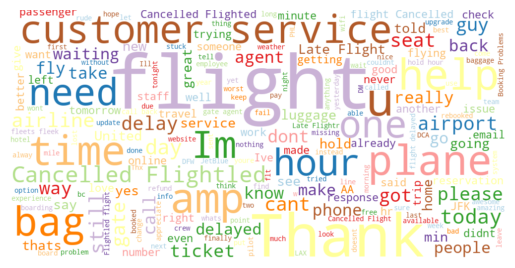

In [38]:
wordcloud = WordCloud(width=1000,height = 500,random_state=20,max_font_size=150,background_color= 'white',colormap='Paired_r').generate(combined)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Visualisations

<Axes: xlabel='polarity', ylabel='subjectivity'>

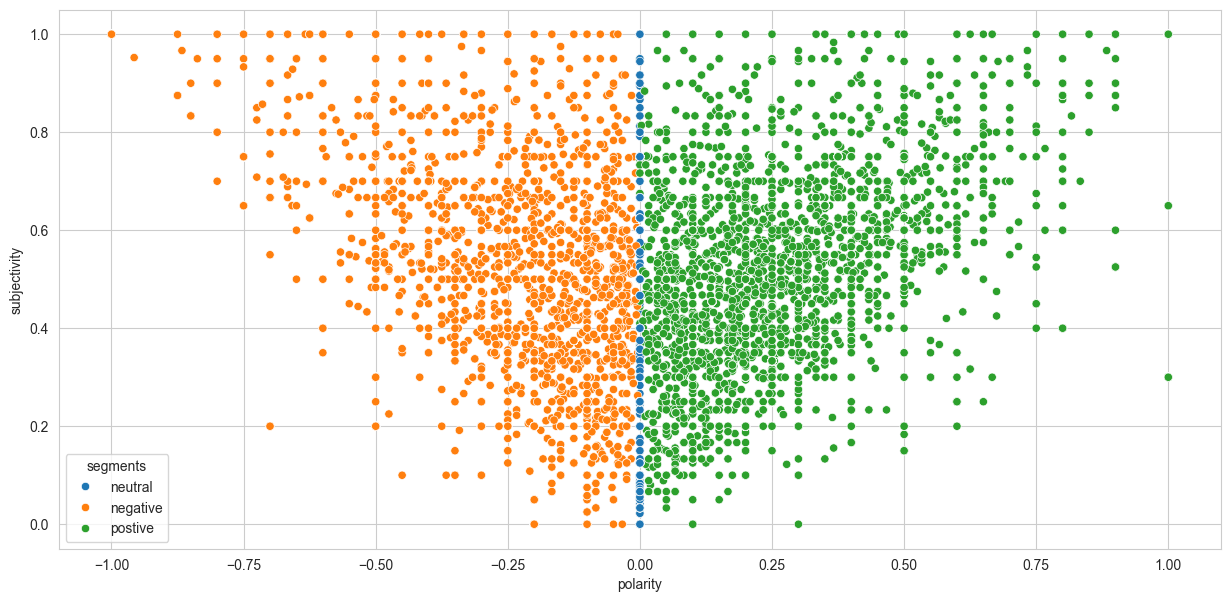

In [21]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.scatterplot(df, x = 'polarity', y ='subjectivity',hue ='segments')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_8928\679334097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'segments',palette='viridis')


<Axes: xlabel='segments', ylabel='count'>

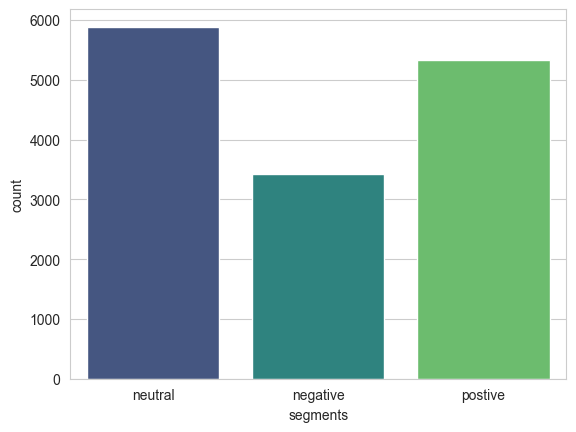

In [22]:
sns.countplot(df, x = 'segments',palette='viridis')

# Text Classification

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer # Term Frequency 
from sklearn.metrics import classification_report

In [24]:
data_text = df['text']
data_targ = df['segments']

In [25]:
tfidf = TfidfVectorizer()

In [26]:
train_data = tfidf.fit_transform(data_text)

In [27]:
text_model = SVC(kernel="linear")

In [28]:
text_model.fit(train_data,data_targ)

SVC(kernel='linear')

In [29]:
predicted_data = text_model.predict(train_data)

In [30]:
print(classification_report(data_targ, predicted_data))

              precision    recall  f1-score   support

    negative       0.96      0.91      0.93      3426
     neutral       0.95      0.98      0.96      5887
     postive       0.96      0.96      0.96      5327

    accuracy                           0.96     14640
   macro avg       0.96      0.95      0.95     14640
weighted avg       0.96      0.96      0.96     14640



In [31]:
import pickle
with open('t_model.pkl','wb') as file:
    pickle.dump(text_model,file)

In [32]:
import pickle
with open('t_model.pkl','rb') as file:
    text_mdl = pickle.load(file)

In [33]:
text = '@USAirways your team member at DCA- Tamara R. is her name was awesome. You should have more employees like her!'
vect_text = tfidf.transform([text])
result = text_mdl.predict(vect_text)[0]

if result == 'postive':
    print('Positive Review')
elif result == 'negative':
    print('Negative Review')
else:
    print('Neutral Review')

Positive Review
